<a href="https://colab.research.google.com/github/Krupa049/ANN/blob/main/Qwerties_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-2ce0d24443bf>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


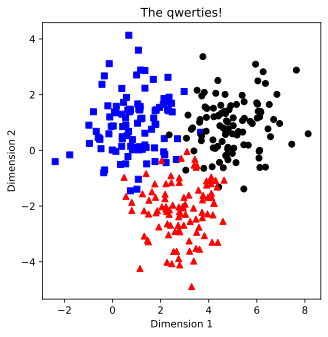

In [2]:
nPerClust = 100
blur = 1

A = [ 1,  1 ]
B = [ 5,  1 ]
C = [ 3, -2 ]

# Generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# True labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# Concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# Convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# Show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')
plt.title('The qwerties!')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [5]:
ANNq = nn.Sequential(
      nn.Linear(2,4),   # input layer
      nn.ReLU(),        # Activation Function
      nn.Linear(4,3),    # Output layer
      nn.Softmax(dim=1),
     )

  # Loss function and Optimizer functions
lossfun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNq.parameters(),lr=.01)

In [7]:
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


In [9]:
numepochs = 10000
losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):

    # Forward pass
  yHat = ANNq(data)

    # Computing the loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

    # Backpropogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  matches = torch.argmax(yHat,axis=1) == labels  # boolean
  matchesNumeric = matches.float()               # Converting to numbers
  accuracyPct = 100*torch.mean(matchesNumeric)   # average
  ongoingAcc.append( accuracyPct )

  # Ending the training loop

  # Computing Model Predictions
predictions = ANNq(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

Final accuracy: 95%


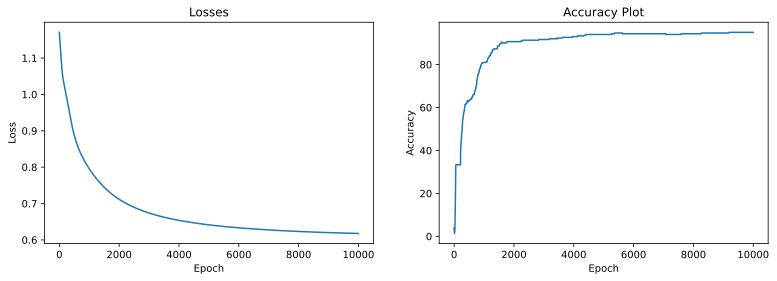

In [10]:
print('Final accuracy: %g%%' %totalacc)

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_title('Accuracy Plot')
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Epoch')
plt.show()

In [11]:
torch.sum(yHat,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

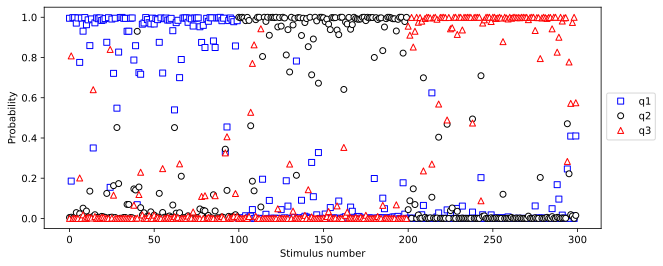

In [15]:
fig = plt.figure(figsize=(10,4))

colorshape = [ 'bs','ko','r^' ]
for i in range(3):
  plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['q1','q2','q3'],loc=(1.01,.4))
plt.show()